In [3]:
%matplotlib inline
import os
# import wfdb as wf 
import numpy as np
import pandas as pd
# from pandas.compat import StringIO # pour pouvoir lire fichiers anotations 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import ndimage
from scipy import signal
from pylab import *
import time
import math
from copy import deepcopy
#from datasets import mitdb as dm
#from biosppy.signals import ecg

In [4]:
df_normal =pd.read_csv('ptbdb_normal.csv', sep=',', header = None)
df_normal.head(12)
df_normal.describe()
#len(df_normal)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,...,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.0,4046.0
mean,0.979670,0.711486,0.311677,0.119575,0.088608,0.130843,0.159653,0.165608,0.168005,0.170783,...,0.001540,0.001332,0.001304,0.001220,0.000991,0.000894,0.000454,0.000474,0.0,0.0
std,0.029061,0.186376,0.183457,0.110457,0.075760,0.081104,0.090131,0.096094,0.102506,0.106190,...,0.018664,0.016234,0.016668,0.016658,0.015204,0.015311,0.010834,0.011202,0.0,0.0
min,0.782178,0.121784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.964468,0.580160,0.164112,0.028731,0.027735,0.070776,0.094656,0.098848,0.095594,0.094988,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,1.000000,0.726449,0.303266,0.092655,0.079476,0.121144,0.134312,0.142771,0.143002,0.145068,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,1.000000,0.863699,0.436091,0.187527,0.134861,0.183746,0.216203,0.217895,0.220572,0.223053,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,0.985955,0.910798,0.846591,0.770205,0.754524,0.749095,0.729192,0.700844,...,0.415879,0.361283,0.383522,0.407025,0.446281,0.483471,0.371502,0.376668,0.0,0.0


In [5]:
df_abnormal =pd.read_csv('ptbdb_abnormal.csv', sep=',', header = None)
df_abnormal.info()
df_abnormal.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,...,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.0,10506.0
mean,0.975468,0.725582,0.438306,0.290384,0.252897,0.249423,0.245668,0.247160,0.250203,0.252396,...,0.001055,0.001057,0.000744,0.000554,0.000533,0.000313,0.000070,0.000074,0.0,1.0
std,0.036354,0.199030,0.262699,0.270977,0.237004,0.211751,0.200159,0.194840,0.193160,0.192341,...,0.022312,0.022585,0.017557,0.013781,0.013553,0.010901,0.003754,0.004044,0.0,0.0
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,0.957325,0.586602,0.236455,0.074064,0.088487,0.101422,0.097175,0.096331,0.098527,0.098041,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,1.000000,0.745646,0.404297,0.212845,0.173046,0.180927,0.182782,0.191793,0.197088,0.200919,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
75%,1.000000,0.890043,0.620889,0.427811,0.343089,0.327582,0.328089,0.347707,0.359378,0.370106,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.265025,0.279310,0.0,1.0


In [6]:
df_normal.max(axis=0)

0      1.000000
1      1.000000
2      0.985955
3      0.910798
4      0.846591
         ...   
183    0.483471
184    0.371502
185    0.376668
186    0.000000
187    0.000000
Length: 188, dtype: float64

In [7]:
#plt.figure(figsize = (20,16)) 
#sns.barplot(df_normal.max(axis=0))

In [8]:
df_norm2 = df_normal.copy()
df_norm2.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
if len(df_norm2.columns) == 188 :
    df_norm2.drop(df_norm2.iloc[:,0:30],1,inplace=True) # on supprime des cols en début de tableau 

Text(0.5, 1.0, 'Distribution des valeurs max sur un battement')

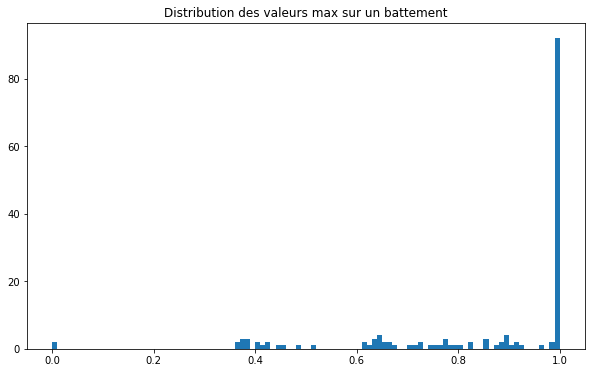

In [10]:
df_norm2.max(axis=0) 

plt.figure(figsize = (10,6)) 
plt.hist(df_norm2.max(axis=0), bins = 100)
plt.title('Distribution des valeurs max sur un battement')
#sns.barplot(x=df_norm2.max(axis=1), data=df_norm2)

In [11]:
df_norm2.max(axis=1)

0       0.964344
1       0.984539
2       1.000000
3       0.938677
4       0.985807
          ...   
4041    0.969822
4042    0.927321
4043    0.983829
4044    1.000000
4045    0.924700
Length: 4046, dtype: float64

In [12]:
maxValueIndex = df_norm2.idxmax(axis = 1)
maxValueIndex.min()

30

Text(0.5, 1.0, 'Distribution du RR interval')

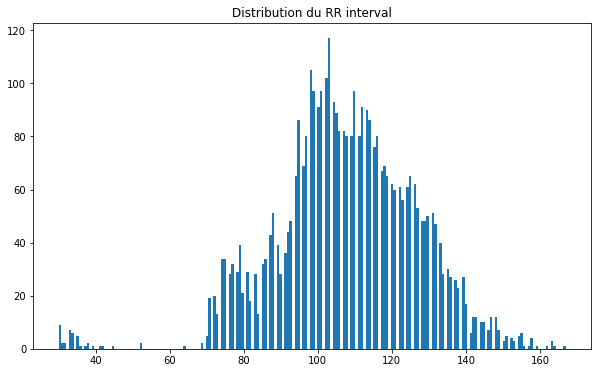

In [13]:
plt.figure(figsize = (10,6)) 
plt.hist(maxValueIndex, bins = 200)
plt.title("Distribution du RR interval")

In [14]:
# on trace le signal si le max est plus petit 

No handles with labels found to put in legend.


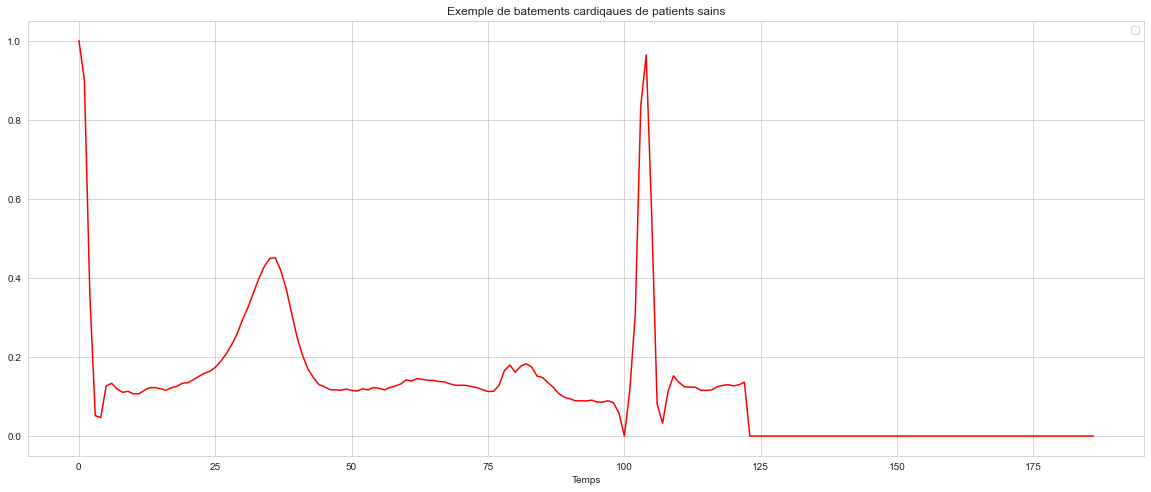

In [15]:
# 3 exemples de battements normaux
sns.set_style('whitegrid') 
plt.figure(figsize = (20,8)) 
plt.plot(df_normal.iloc[0, 0:187], color = 'red') 
plt.xlabel('Temps')
plt.title('Exemple de batements cardiqaues de patients sains')  
plt.legend() 
plt.show()

In [16]:
plt.figure(figsize = (20,8)) 
sns.

SyntaxError: invalid syntax (<ipython-input-16-1b53e4dc1a73>, line 2)

In [ ]:
range(len(df_normal))

In [ ]:
#sns.relplot(x='g', y='pf', kind='line', data=df[df['g']<50]) ;

In [ ]:

j=0
for i in range(len(df_normal)) :
    if (maxValueIndex.iloc[i] < 50) & (j<10) :
        j+=1
        print(maxValueIndex[i])
        plt.figure(figsize = (10,6)) 
        plt.plot(df_norm2.iloc[i, 0:187], color = 'red')
        plt.xlabel('Temps')
        plt.title('Exemple de batements cardiqaues de patients sains')  
        plt.legend() 
        plt.show()

In [22]:
temps=np.linspace(0,1500,186)
len(temps)

[   0.            8.10810811   16.21621622   24.32432432   32.43243243
   40.54054054   48.64864865   56.75675676   64.86486486   72.97297297
   81.08108108   89.18918919   97.2972973   105.40540541  113.51351351
  121.62162162  129.72972973  137.83783784  145.94594595  154.05405405
  162.16216216  170.27027027  178.37837838  186.48648649  194.59459459
  202.7027027   210.81081081  218.91891892  227.02702703  235.13513514
  243.24324324  251.35135135  259.45945946  267.56756757  275.67567568
  283.78378378  291.89189189  300.          308.10810811  316.21621622
  324.32432432  332.43243243  340.54054054  348.64864865  356.75675676
  364.86486486  372.97297297  381.08108108  389.18918919  397.2972973
  405.40540541  413.51351351  421.62162162  429.72972973  437.83783784
  445.94594595  454.05405405  462.16216216  470.27027027  478.37837838
  486.48648649  494.59459459  502.7027027   510.81081081  518.91891892
  527.02702703  535.13513514  543.24324324  551.35135135  559.45945946
  567.5

186

In [25]:
#sns.relplot(x=temps, y=df_normal, 
#            data=df_normal, kind='line'); 

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 4046 and the vector passed to `x` has length 186.